In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### EDA Process

In [3]:
df.shape

(50, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
df.duplicated().any()

False

In [8]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

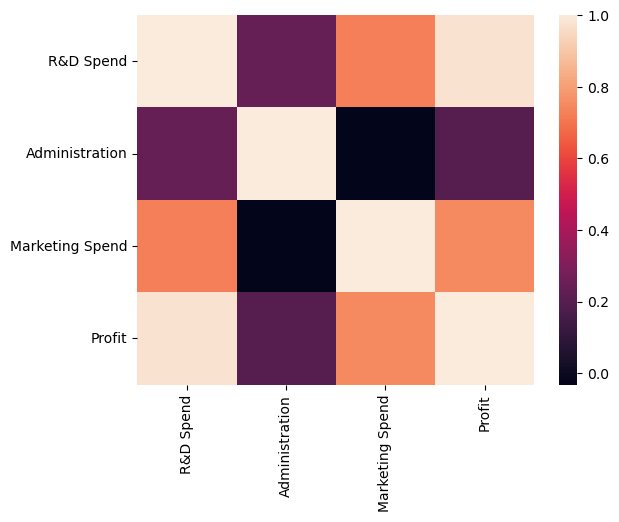

In [9]:
sns.heatmap(df.corr())

<Axes: >

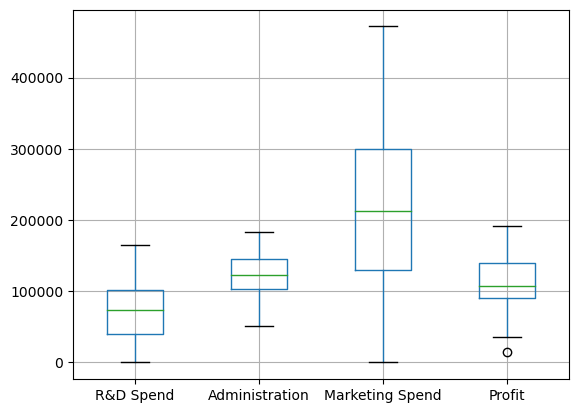

In [10]:
df.boxplot()

#### About the boxplot
##### In profit data one outlier i  the bottom

## Removing the outlier

In [11]:
Q1 = df.Profit.quantile(0.25)
Q3 = df.Profit.quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 -(1.5*IQR)
upper_bound = Q3 + (1.5*IQR)
print('first quantile=',Q1, '\nInter_quantile_range=',IQR, '\nThird_quantile=',Q3, '\nlower bound=',lower_bound,'\nupper_bound=',upper_bound)

first quantile= 90138.9025 
Inter_quantile_range= 49627.07499999998 
Third_quantile= 139765.97749999998 
lower bound= 15698.290000000023 
upper_bound= 214206.58999999997


In [12]:
outlier =df.Profit[(df.Profit<lower_bound) | (df.Profit>upper_bound)]
outlier

49    14681.4
Name: Profit, dtype: float64

<Axes: >

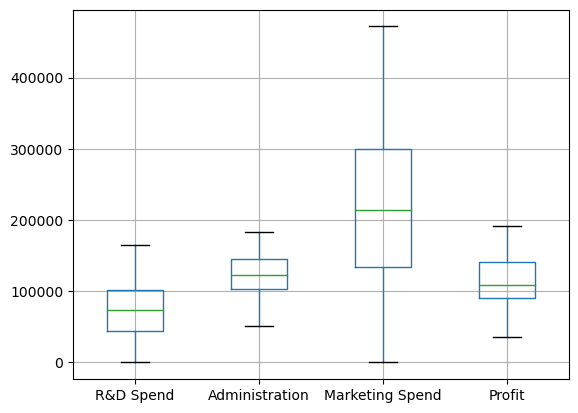

In [13]:
df1 = df[(df.Profit>lower_bound)& (df.Profit<upper_bound)]
df1.boxplot()

In [14]:
df1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#####  ABOUT
#####  In this data there is no null values & also no duplicated values

## Linear Regression

In [15]:
reg = LinearRegression()
reg.fit(df[['R&D Spend','Administration','Marketing Spend']],df.Profit)

LinearRegression()

In [16]:
y_pred = reg.predict(df[['R&D Spend','Administration','Marketing Spend']])

In [17]:
reg.coef_

array([ 0.80571505, -0.02681597,  0.02722806])

In [18]:
y_pred.shape

(50,)

In [19]:
df['Pred_Profit'] = y_pred
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Pred_Profit
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183


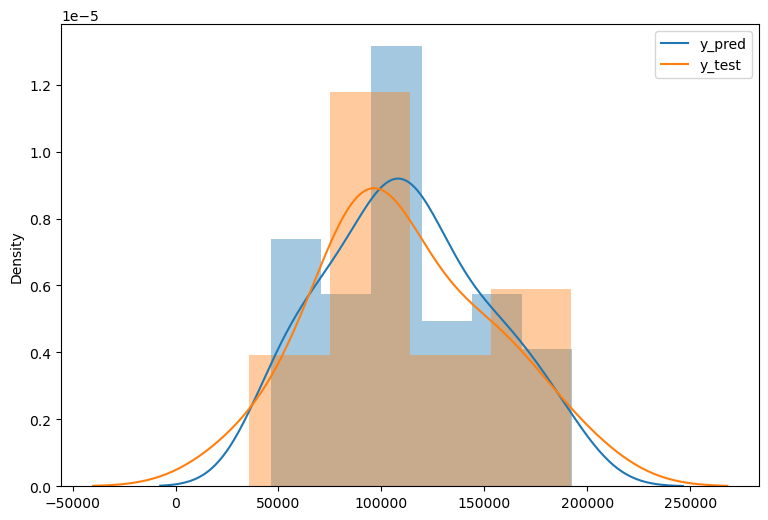

In [40]:
plt.figure(figsize=(9,6))
labels = ('y_pred','y_test')
sns.distplot(y_pred)
sns.distplot(y_test)
plt.legend(labels)

In [20]:
error = df.Profit - df.Pred_Profit
error.sum()

-8.440110832452774e-10

In [21]:
feature = df1[['R&D Spend','Administration','Marketing Spend']]
feature.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [22]:
target = df1[['Profit']]
target.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [23]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,train_size=0.75,random_state=100)

In [24]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(36, 3)
(36, 1)
(13, 3)
(13, 1)


In [25]:
reg.fit(x_train,y_train)

LinearRegression()

In [26]:
y_test

,Profit
6,156122.51
20,118474.03
33,96778.92
28,103282.38
42,71498.49
48,35673.41
5,156991.12
32,97427.84
41,77798.83
31,97483.56


In [27]:
y_pred1 = reg.predict(x_test)
y_pred1

array([[158820.25296628],
       [117317.06319034],
       [100827.21000941],
       [101019.73744058],
       [ 75359.58642816],
       [ 59295.54071968],
       [163529.98963127],
       [102881.97026047],
       [ 79952.78341443],
       [ 99450.58866939],
       [188060.88893932],
       [138156.98482113],
       [ 96172.69088621]])

In [28]:
error = y_test-y_pred1
error

,Profit
6,-2697.742966
20,1156.966810
33,-4048.290009
28,2262.642559
42,-3861.096428
48,-23622.130720
5,-6538.869631
32,-5454.130260
41,-2153.953414
31,-1967.028669


In [29]:
error.sum()

Profit   -42843.827377
dtype: float64

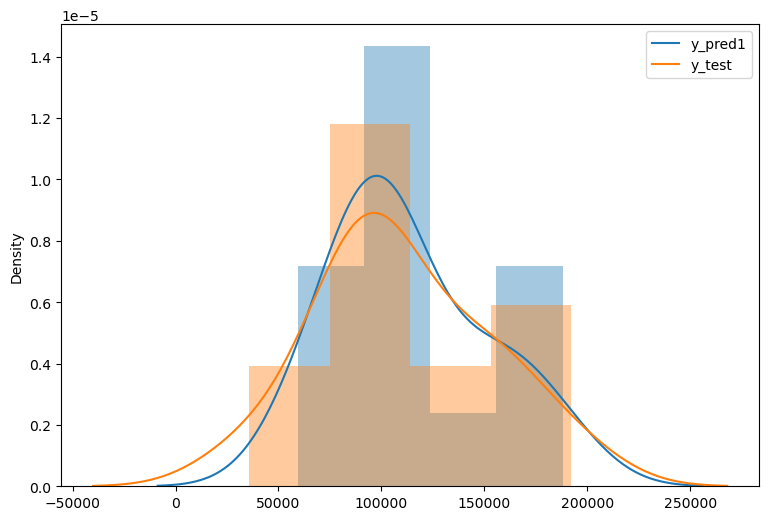

In [42]:
plt.figure(figsize=(9,6))
labels = ('y_pred1','y_test')
sns.distplot(y_pred1)
sns.distplot(y_test)
plt.legend(labels)